## 1 Decision Tree

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}},
             'Overcast': 'Yes',
             'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}

Prediction: Play = No


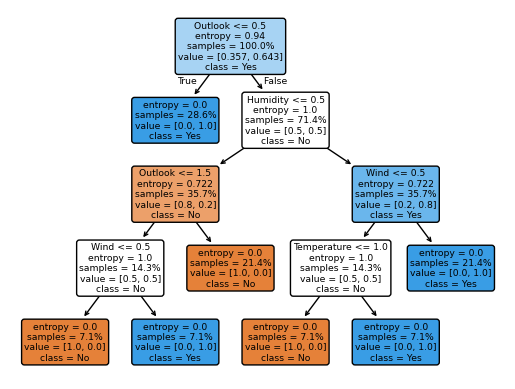

In [2]:
import math
import pandas as pd
import pprint
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder


def entropy(col):
    e=0
    total=len(col)
    count=col.value_counts()
    for decision in col.unique():
        e-=count[decision]/total*math.log2(count[decision]/total)
    return e   
def gain(df,col,target):
    g=entropy(df[target])
    for value in df[col].unique():
        table=df[df[col]==value]
        g-=len(table)/len(df[col])*entropy(table[target])
    return g    
def Id3(df,target,features):
    if len(df[target].unique())==1:
        return df[target].iloc[0]
    best=max(features,key=lambda col:gain(df,col,target))
    tree={best:{}}
    for value in df[best].unique():
        subset=df[df[best]==value]
        tree[best][value]=Id3(subset,target,[ f for f in features if f!=best])
    return tree

df=pd.read_csv("weather.csv")
tree=Id3(df,"Play",df.columns[:-1])
pprint.pp(tree)
         
encoders = {col: LabelEncoder() for col in df.columns}
df = df.apply(lambda col: encoders[col.name].fit_transform(col))
x=df.iloc[:,:-1]
y=df["Play"]
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(x,y)
plt=plot_tree(clf,feature_names=df.columns,class_names=["No","Yes"],proportion=True,rounded=True,filled=True)
sample = pd.DataFrame([{'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}])
sample = sample.apply(lambda col: encoders[col.name].transform(col))
# Prediction
pred = clf.predict(sample)
label = encoders['Play'].inverse_transform(pred)[0]
print(f"\nPrediction: Play = {label}")




## 2 Simple Linear using scratch

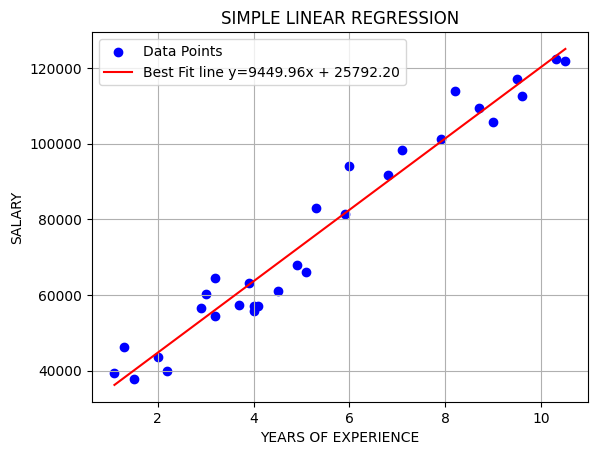

Enter experience to Predict Salary 1


Predicted Salary is: 35242.163


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("sl.csv")
X=df['YearsExperience']
Y=df['Salary']
num=(((X-X.mean())*(Y-Y.mean()))).sum()
den=((X-X.mean())**2).sum()
slope=num/den
intercept=Y.mean()-slope*X.mean()
Y_pred=slope*X+intercept
plt.scatter(X,Y,color='blue',label='Data Points')
plt.plot(X,Y_pred,label=f'Best Fit line y={slope:.2f}x + {intercept:.2f}',color='red')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.title('SIMPLE LINEAR REGRESSION')
plt.legend()
plt.grid(True)
plt.show()
x=int(input("Enter experience to Predict Salary"))
predict=slope*x+intercept
print("Predicted Salary is:",predict.round(3))



## Simple Linear using Library

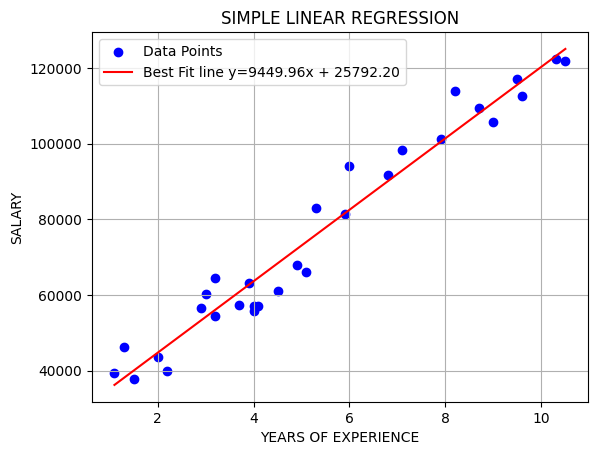

Enter experience to Predict Salary 1


Predicted Salary is: 35242.163


C:\Users\yp901\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df=pd.read_csv("sl.csv")
X = df[['YearsExperience']]
Y=df['Salary']
model=LinearRegression()
model.fit(X,Y)
slope=model.coef_[0]
intercept=model.intercept_
Y_pred=model.predict(X)
plt.scatter(X,Y,color='blue',label='Data Points')
plt.plot(X,Y_pred,label=f'Best Fit line y={slope:.2f}x + {intercept:.2f}',color='red')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.title('SIMPLE LINEAR REGRESSION')
plt.legend()
plt.grid(True)
plt.show()
x=int(input("Enter experience to Predict Salary"))
predict=model.predict([[x]])
print("Predicted Salary is:",predict[0].round(3))



## 3 KNN Using Scratch

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('knn.csv')
data=df[["Brightness","Saturation"]]
points=np.array([20,35])
distances=np.sqrt(((data-points)**2).sum(axis=1))
df["Distance"]=distances
print(f'Given Points:{points}')
k=int(input('Enter k(Number of neighbors) to predict class'))
k_near=df.nsmallest(k,"Distance")["Class"]
print(f'Predicted class:{k_near.mode()[0]}')

Given Points:[20 35]


Enter k(Number of neighbors) to predict class 3


Predicted class:Red


## KNN Using Library

In [54]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('knn.csv')
X = df[['Brightness', 'Saturation']]
y = df['Class']
sample = [[20, 35]]
k=int(input('Enter k(Number of neighbors) to predict class'))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
print("Predicted Class:", knn.predict(sample)[0])


Enter k(Number of neighbors) to predict class 3


Predicted Class: Red


C:\Users\yp901\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 4 K MEANS Using scratch


---- Iteration-1 ----
Assignments:
A1    C1
A2    C3
A3    C2
A4    C2
A5    C2
A6    C2
A7    C3
A8    C2
dtype: object

Updated Centroids:
           x     y
cluster           
C1       2.0  10.0
C2       6.0   6.0
C3       1.5   3.5

---- Iteration-2 ----
Assignments:
A1    C1
A2    C3
A3    C2
A4    C2
A5    C2
A6    C2
A7    C3
A8    C1
dtype: object

Updated Centroids:
           x     y
cluster           
C1       3.0  9.50
C2       6.5  5.25
C3       1.5  3.50

---- Iteration-3 ----
Assignments:
A1    C1
A2    C3
A3    C2
A4    C1
A5    C2
A6    C2
A7    C3
A8    C1
dtype: object

Updated Centroids:
                x         y
cluster                    
C1       3.666667  9.000000
C2       7.000000  4.333333
C3       1.500000  3.500000

---- Iteration-4 ----
Assignments:
A1    C1
A2    C3
A3    C2
A4    C1
A5    C2
A6    C2
A7    C3
A8    C1
dtype: object

Updated Centroids:
                x         y
cluster                    
C1       3.666667  9.000000
C2       7.000000 

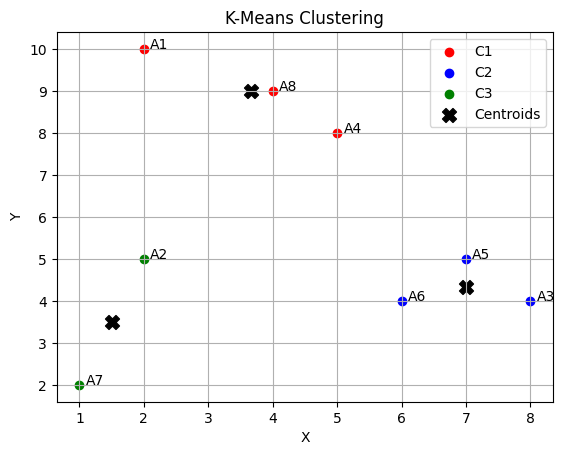

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
k = 3  # Number of clusters
index = [f"A{i}" for i in range(1, 9)]
# Step 1: Define the dataset
data = pd.DataFrame({
    'x': [2, 2, 8, 5, 7, 6, 1, 4],
    'y': [10, 5, 4, 8, 5, 4, 2, 9]
}, index=index)
# Step 2: Manually specify initial cluster centers
clusters = pd.DataFrame({
    "x": [2, 5, 1],     # C1, C2, C3
    "y": [10, 8, 2]
}, index=["C1", "C2", "C3"])
iteration = 1
while True:
    print(f'\n---- Iteration-{iteration} ----')
    # Step 3: Calculate distances to centroids
    distance = pd.DataFrame(np.linalg.norm(data[["x", "y"]].values[:, None] - clusters[["x", "y"]].values, axis=2),index=data.index, columns=clusters.index)
    # Step 4: Assign clusters
    assignments = distance.idxmin(axis=1)
    data["cluster"] = assignments
    print("Assignments:")
    print(assignments)
    # Step 5: Update centroids
    newClusters = data.groupby("cluster")[["x", "y"]].mean()
    print("\nUpdated Centroids:")
    print(newClusters)
    # Step 6: Check convergence
    if newClusters.equals(clusters):
        print("\nConverged.")
        break
    clusters = newClusters
    iteration += 1
print(f"\nFinal Cluster Centers:\n{clusters}")
print(f"\nFinal Assignments:\n{assignments}")

# Plotting
colors = {'C1': 'red', 'C2': 'blue', 'C3': 'green'}
for cluster_label, group in data.groupby('cluster'):
    plt.scatter(group['x'], group['y'], color=colors[cluster_label], label=cluster_label)
# Plot centroids
plt.scatter(clusters['x'], clusters['y'], color='black', marker='X', s=100, label='Centroids')
# Annotate points
for idx, row in data.iterrows():
    plt.text(row['x'] + 0.1, row['y'], idx)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


## K MEANS using library


Final Cluster Centers:
            x         y
C1  3.666667  9.000000
C2  7.000000  4.333333
C3  1.500000  3.500000

Final Assignments:
 A1    C1
A2    C3
A3    C2
A4    C1
A5    C2
A6    C2
A7    C3
A8    C1
Name: cluster, dtype: object


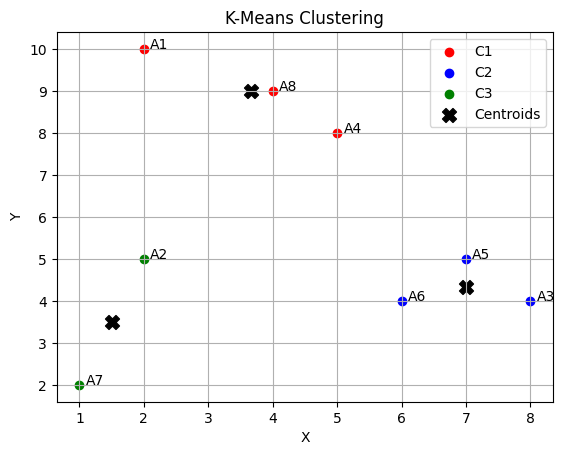

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Define dataset
index = [f"A{i}" for i in range(1, 9)]
data = pd.DataFrame({
    'x': [2, 2, 8, 5, 7, 6, 1, 4],
    'y': [10, 5, 4, 8, 5, 4, 2, 9]
}, index=index)
# Step 2: Apply KMeans clustering with 3 clusters and custom init
kmeans = KMeans(n_clusters=3, init=[[2,10], [5,8], [1,2]], n_init=1)
kmeans.fit(data)
# Step 3: Add cluster labels to the data
data['cluster'] = [f"C{i+1}" for i in kmeans.labels_]
centers = pd.DataFrame(kmeans.cluster_centers_, columns=["x", "y"], index=["C1", "C2", "C3"])
print("\nFinal Cluster Centers:\n", centers)
print("\nFinal Assignments:\n", data["cluster"])

# Step 4: Plot the results
colors = {'C1': 'red', 'C2': 'blue', 'C3': 'green'}
for cluster_label, group in data.groupby('cluster'):
    plt.scatter(group['x'], group['y'], color=colors[cluster_label], label=cluster_label)
# Plot centroids
plt.scatter(centers['x'], centers['y'], color='black', marker='X', s=100, label='Centroids')
# Annotate points
for idx, row in data.iterrows():
    plt.text(row['x'] + 0.1, row['y'], idx)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


## 5 NAVIE BAYS

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
df = pd.read_csv('weather.csv')
encoders = {col: LabelEncoder() for col in df.columns}
df = df.apply(lambda col: encoders[col.name].fit_transform(col))
X, y = df.drop('Play', axis=1), df['Play']
model = CategoricalNB().fit(X, y)
accuracy = accuracy_score(y, model.predict(X))
# Sample input
sample = pd.DataFrame([{'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}])
sample = sample.apply(lambda col: encoders[col.name].transform(col))
# Prediction
proba = model.predict_proba(sample)[0]
pred = model.predict(sample)
label = encoders['Play'].inverse_transform(pred)[0]

# Output
print("\nNAIVE BAYES CLASSIFIER – Library Version")
print(f"Sample: {sample.to_dict(orient='records')[0]}")
print(f"Posterior probability for 'Yes': {proba[1]:.3f}")
print(f"Posterior probability for 'No' : {proba[0]:.3f}")
print(f"\nPrediction: Play = {label}")
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")


NAIVE BAYES CLASSIFIER – Library Version
Sample: {'Outlook': 2, 'Temperature': 0, 'Humidity': 0, 'Wind': 0}
Posterior probability for 'Yes': 0.280
Posterior probability for 'No' : 0.720

Prediction: Play = No

Training Accuracy: 92.86%


## 6 Multiple Regression using scratch

Regression Equation: Price = 3575.38 + 186.13 * Size + -10012.38 * Bedrooms


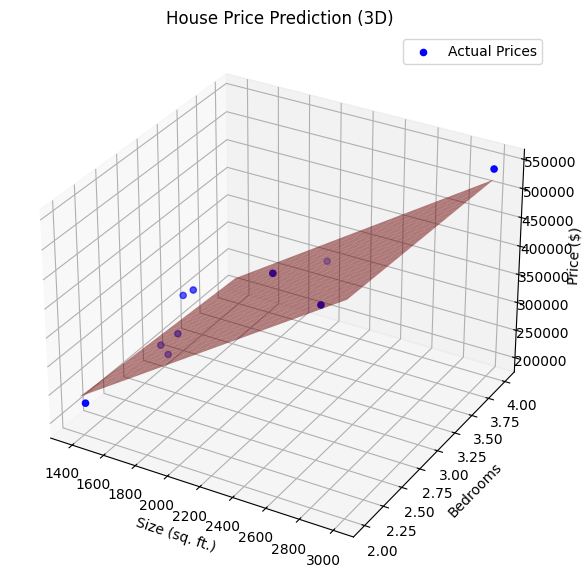

Prediction


Enter house size (sq. ft.):  455
Enter number of bedrooms:  14


Predicted Price for 455.0 sq. ft. and 14 bedrooms: $-51908.70


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('housedata.csv')
X1=df['Size']
X2=df['Bedrooms']
Y=df['Price']
n=len(X1)
A=np.array([
    [n,X1.sum(),X2.sum()],
    [X1.sum(),(X1**2).sum(),(X1*X2).sum()],
    [X2.sum(),(X1*X2).sum(),(X2**2).sum()]
])
B=np.array([Y.sum(),(X1*Y).sum(),(X2*Y).sum()])
sol=np.linalg.solve(A,B)
b0,b1,b2=sol
print(f"Regression Equation: Price = {b0:.2f} + {b1:.2f} * Size + {b2:.2f} * Bedrooms")

from mpl_toolkits.mplot3d import Axes3D ##imp
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y,color='blue',label='Actual Prices')
X1_range=np.linspace(X1.min(),X1.max(),20)
X2_range=np.linspace(X2.min(),X2.max(),20)
X1_grid,X2_grid=np.meshgrid(X1_range,X2_range)
Y_pred_grid=b0+b1*X1_grid+b2*X2_grid
ax.plot_surface(X1_grid,X2_grid,Y_pred_grid,color='red',alpha=0.5)
ax.set_xlabel("Size (sq. ft.)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price ($)")
ax.set_title("House Price Prediction (3D)")
plt.legend()
plt.show()
print("Prediction")
size= float(input("Enter house size (sq. ft.): "))
bedrooms= int(input("Enter number of bedrooms: "))
predicted_price= b0 + b1 * size + b2 * bedrooms
print(f"Predicted Price for {size} sq. ft. and {bedrooms} bedrooms: ${predicted_price:.2f}")

## Multiple Regression using Library

Regression Equation Line: 3575.38 +186.13*Size + -10012.382*Bedrooms 


C:\Users\yp901\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


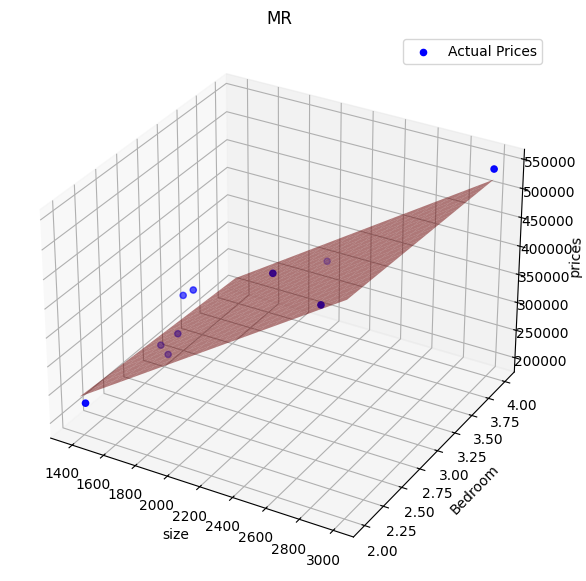

Prediction


Enter house Size 2200
Enter number of beds 4


Predicted Price: 373012.433


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
df=pd.read_csv('housedata.csv')
X1=df['Size']
X2=df['Bedrooms']
Y=df['Price']
X=df[['Size','Bedrooms']]
model = LinearRegression()
model.fit(X, Y)
b0 = model.intercept_
b1, b2 = model.coef_
print(f"Regression Equation Line: {b0.round(3)} +{b1.round(3)}*Size + {b2.round(3)}*Bedrooms ")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y,color='blue',label='Actual Prices')
X1_range=np.linspace(X1.min(),X1.max(),20)
X2_range=np.linspace(X2.min(),X2.max(),20)
X1_grid,X2_grid=np.meshgrid(X1_range,X2_range)
predict = model.predict(np.c_[X1_grid.ravel(), X2_grid.ravel()]).reshape(X1_grid.shape)
ax.plot_surface(X1_grid,X2_grid,predict,color='red',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('Bedroom')
ax.set_zlabel('prices')
ax.set_title('MR')
plt.legend()
plt.show()
print('Prediction')
size=float(input('Enter house Size'))
bed=int(input('Enter number of beds'))
price=b0+b1*size+b2*bed
print("Predicted Price:",price.round(3))


## 7 A* Algorithm

In [18]:
import heapq

start = ((1, 8, 2), (4, 0, 3), (7, 6, 5))
goal = ((1, 2, 3), (4, 5, 6), (7, 8, 0))
def manhattan(s):
    p = {v: (i, j) for i, r in enumerate(goal) for j, v in enumerate(r)}
    return sum(abs(i - p[v][0]) + abs(j - p[v][1]) for i, r in enumerate(s) for j, v in enumerate(r) if v)
def neighbors(s):
    x, y = [(i, j) for i in range(3) for j in range(3) if s[i][j] == 0][0]
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < 3 and 0 <= ny < 3:
            t = [list(row) for row in s]
            t[x][y], t[nx][ny] = t[nx][ny], t[x][y]
            yield tuple(map(tuple, t))
def a_star(s):
    seen = set()
    h = [(manhattan(s), 0, s, [])]
    while h:
        f, g, s, p = heapq.heappop(h)
        if s == goal: return p + [s]
        if s in seen: continue
        seen.add(s)
        for n in neighbors(s):
            heapq.heappush(h, (g+1+manhattan(n), g+1, n, p + [s]))
for i, step in enumerate(a_star(start)):
    print(f"Step {i}:\n" + "\n".join(str(row) for row in step), end="\n\n")


Step 0:
(1, 8, 2)
(4, 0, 3)
(7, 6, 5)

Step 1:
(1, 0, 2)
(4, 8, 3)
(7, 6, 5)

Step 2:
(1, 2, 0)
(4, 8, 3)
(7, 6, 5)

Step 3:
(1, 2, 3)
(4, 8, 0)
(7, 6, 5)

Step 4:
(1, 2, 3)
(4, 8, 5)
(7, 6, 0)

Step 5:
(1, 2, 3)
(4, 8, 5)
(7, 0, 6)

Step 6:
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

Step 7:
(1, 2, 3)
(4, 5, 0)
(7, 8, 6)

Step 8:
(1, 2, 3)
(4, 5, 6)
(7, 8, 0)



## SVM

Point[5.1 3.5]=>Predicted Class :0
Point[4.9 3. ]=>Predicted Class :0
Point[4.7 3.2]=>Predicted Class :0
Point[4.6 3.1]=>Predicted Class :0
Point[5.  3.6]=>Predicted Class :0
Point[5.4 3.9]=>Predicted Class :0
Point[4.6 3.4]=>Predicted Class :0
Point[5.  3.4]=>Predicted Class :0
Point[4.4 2.9]=>Predicted Class :0
Point[4.9 3.1]=>Predicted Class :0
Point[5.4 3.7]=>Predicted Class :0
Point[4.8 3.4]=>Predicted Class :0
Point[4.8 3. ]=>Predicted Class :0
Point[4.3 3. ]=>Predicted Class :0
Point[5.8 4. ]=>Predicted Class :0
Point[5.7 4.4]=>Predicted Class :0
Point[5.4 3.9]=>Predicted Class :0
Point[5.1 3.5]=>Predicted Class :0
Point[5.7 3.8]=>Predicted Class :0
Point[5.1 3.8]=>Predicted Class :0
Point[5.4 3.4]=>Predicted Class :0
Point[5.1 3.7]=>Predicted Class :0
Point[4.6 3.6]=>Predicted Class :0
Point[5.1 3.3]=>Predicted Class :0
Point[4.8 3.4]=>Predicted Class :0
Point[5. 3.]=>Predicted Class :0
Point[5.  3.4]=>Predicted Class :0
Point[5.2 3.5]=>Predicted Class :0
Point[5.2 3.4]=>Predic

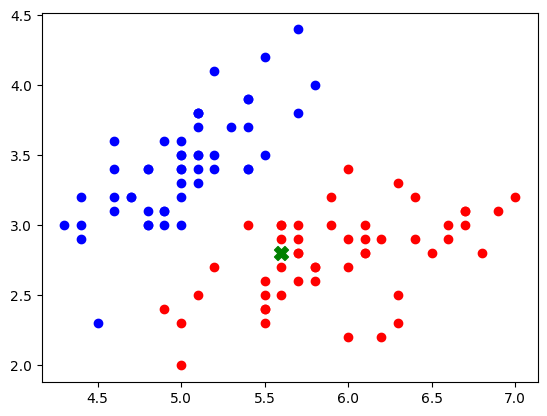

In [3]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
iris=load_iris()
x=iris.data[:,:2]
y=iris.target
model=SVC(kernel='linear')
model.fit(x,y)
predictions=model.predict(x)
import matplotlib.pyplot as plt
import numpy as np
sample=np.array([[5.6,2.8]])
sam=model.predict(sample)
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='blue',label='class 0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='red',label='class 1')
plt.scatter(sample[:,0],sample[:,1],color='green',marker='X',s=100)
for i,l in zip(x,predictions):
    print(f"Point{i}=>Predicted Class :{l}")
print("Accuracy Score",accuracy_score(y,predictions)*100)    


## ANN

In [4]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
iris=load_iris()
x=iris.data[:,:2]
y=iris.target
model=MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000,random_state=42)
model.fit(x,y)
predictions=model.predict(x)
# View weights and biases
print("\nWeights between input and hidden layer:")
print(model.coefs_[0])  # shape: (n_features, n_hidden_neurons)

print("\nBiases of hidden layer:")
print(model.intercepts_[0])  # shape: (n_hidden_neurons,)

print("\nWeights between hidden and output layer:")
print(model.coefs_[1])  # shape: (n_hidden_neurons, n_outputs)

print("\nBiases of output layer:")
print(model.intercepts_[1])  # shape: (n_outputs,)

for i,l in zip(x,predictions):
    print(f"Point{i}=>Predicted Class :{l}")
print("Accuracy Score",accuracy_score(y,predictions)*100) 
cm=confusion_matrix(y,predictions)
print(cm)



Weights between input and hidden layer:
[[-2.06559144e-06  3.47337562e-01  2.95257366e-01  5.00136430e-08
  -1.89896468e-02 -4.49803528e-01 -6.02910775e-02  1.42277294e+00
   1.62536621e-01  1.00562462e+00]
 [-8.26680879e-02  1.37261846e+00  5.23066344e-01 -6.77639671e-03
  -1.24040086e-02  7.85390940e-01 -3.45790085e-04 -8.86775284e-01
  -1.01538280e-01 -1.00427380e+00]]

Biases of hidden layer:
[ 0.15818388  0.13127179 -0.6756066  -0.18899289 -0.06212642  1.26493696
 -0.42472541 -0.911377    0.56082635 -1.31276037]

Weights between hidden and output layer:
[[ 1.08697415e-07 -1.20471231e-02 -4.77874868e-02]
 [ 1.09768293e+00  3.51983342e-01  2.20360878e-01]
 [ 4.74377800e-02 -8.20665050e-01  1.77481540e-01]
 [-1.46922049e-13 -2.50270612e-02 -1.55124108e-24]
 [-6.33189417e-02  3.65482030e-02 -1.46991179e-03]
 [ 8.29035038e-01 -2.33488256e-02 -7.73705411e-01]
 [ 5.53392669e-17 -9.28675018e-03  6.54919032e-02]
 [-3.32374675e-01  9.46104214e-01  9.17835589e-01]
 [-2.01637275e-01  9.78778

C:\Users\yp901\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Dataset for OR gate
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)
model.fit(x, y)
predictions = model.predict(x)

print("\nWeights between input and hidden layer:")
print(model.coefs_[0])
print("\nBiases of hidden layer:")
print(model.intercepts_[0])
print("\nWeights between hidden and output layer:")
print(model.coefs_[1])
print("\nBiases of output layer:")
print(model.intercepts_[1])

for i, l in zip(x, predictions):
    print(f"Input {i} => Predicted: {l}")

print("Accuracy Score:", accuracy_score(y, predictions) * 100)
print("Confusion Matrix:\n", confusion_matrix(y, predictions))



Weights between input and hidden layer:
[[-1.35526023e-04  1.68168527e+00]
 [ 2.91527103e-02  1.19987071e+00]]

Biases of hidden layer:
[-8.42578812e-01 -2.49709547e-04]

Weights between hidden and output layer:
[[-0.4513884 ]
 [ 1.98397058]]

Biases of output layer:
[-0.17339078]
Input [0, 0] => Predicted: 0
Input [0, 1] => Predicted: 1
Input [1, 0] => Predicted: 1
Input [1, 1] => Predicted: 1
Accuracy Score: 100.0
Confusion Matrix:
 [[1 0]
 [0 3]]


C:\Users\yp901\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
